## <center> Detección de sarcasmo con regresión logística
    
Utilizaremos el conjunto de datos del [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" con más de 1 millón de comentarios de Reddit, etiquetados como sarcásticos o no. Una versión procesada se puede encontrar en Kaggle en forma de [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

La detección del sarcasmo es fácil.

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Pandas to show full width of columns 
pd.set_option('max_colwidth', None)

In [33]:
df = pd.read_csv('/Users/miguelopez/Desktop/Machine Learning_2/6-NLP/2-NLTK&CountVectorizer/data/train-balanced-sarcasm.csv')
df.head()


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,You do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york nigga"" ones are.",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for that. It was made by our boy EASports_MUT


# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


Comprueba que está balanceado

Divide el dataset en train test. ¿Qué forma tienen?

In [34]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [35]:
# Drop rows with missing values in the 'comment' column
df.dropna(subset=['comment'], inplace=True) 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


## Tareas:
1. Analizar el conjunto de datos, hacer algunos gráficos. Este [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) podría servir de ejemplo
2. Construir un pipeline Tf-Idf + regresión logística para predecir sarcasmo (`etiqueta`) basado en el texto de un comentario en Reddit (`comentario`).
3. Trazar las palabras/bigramas que más predicen el sarcasmo (puedes usar [eli5](https://github.com/TeamHG-Memex/eli5) para ello).
4. (opcionalmente) añadir subreddits como nuevas características para mejorar el rendimiento del modelo. Aplica aquí el enfoque Bag of Words, es decir, trata cada subreddit como una nueva característica.

In [36]:
import plotly.graph_objects as go
import plotly.offline as py
from wordcloud import STOPWORDS
from collections import defaultdict
from plotly import tools
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:

''' Split the dataframe into two dataframes,
el == 1) and one for the non-sarcastic tweets (label == 0). This allows us to easily 
work with the two classes of tweets separately.'''

train1_df = df[df["label"]==1]
train0_df = df[df["label"]==0]
print(df['label'].value_counts())

0    505405
1    505368
Name: label, dtype: int64


In [38]:
# WordCloud is used to generate word cloud visualizations. STOPWORDS provides
# a list of common words to ignore when generating word clouds.

from wordcloud import WordCloud, STOPWORDS

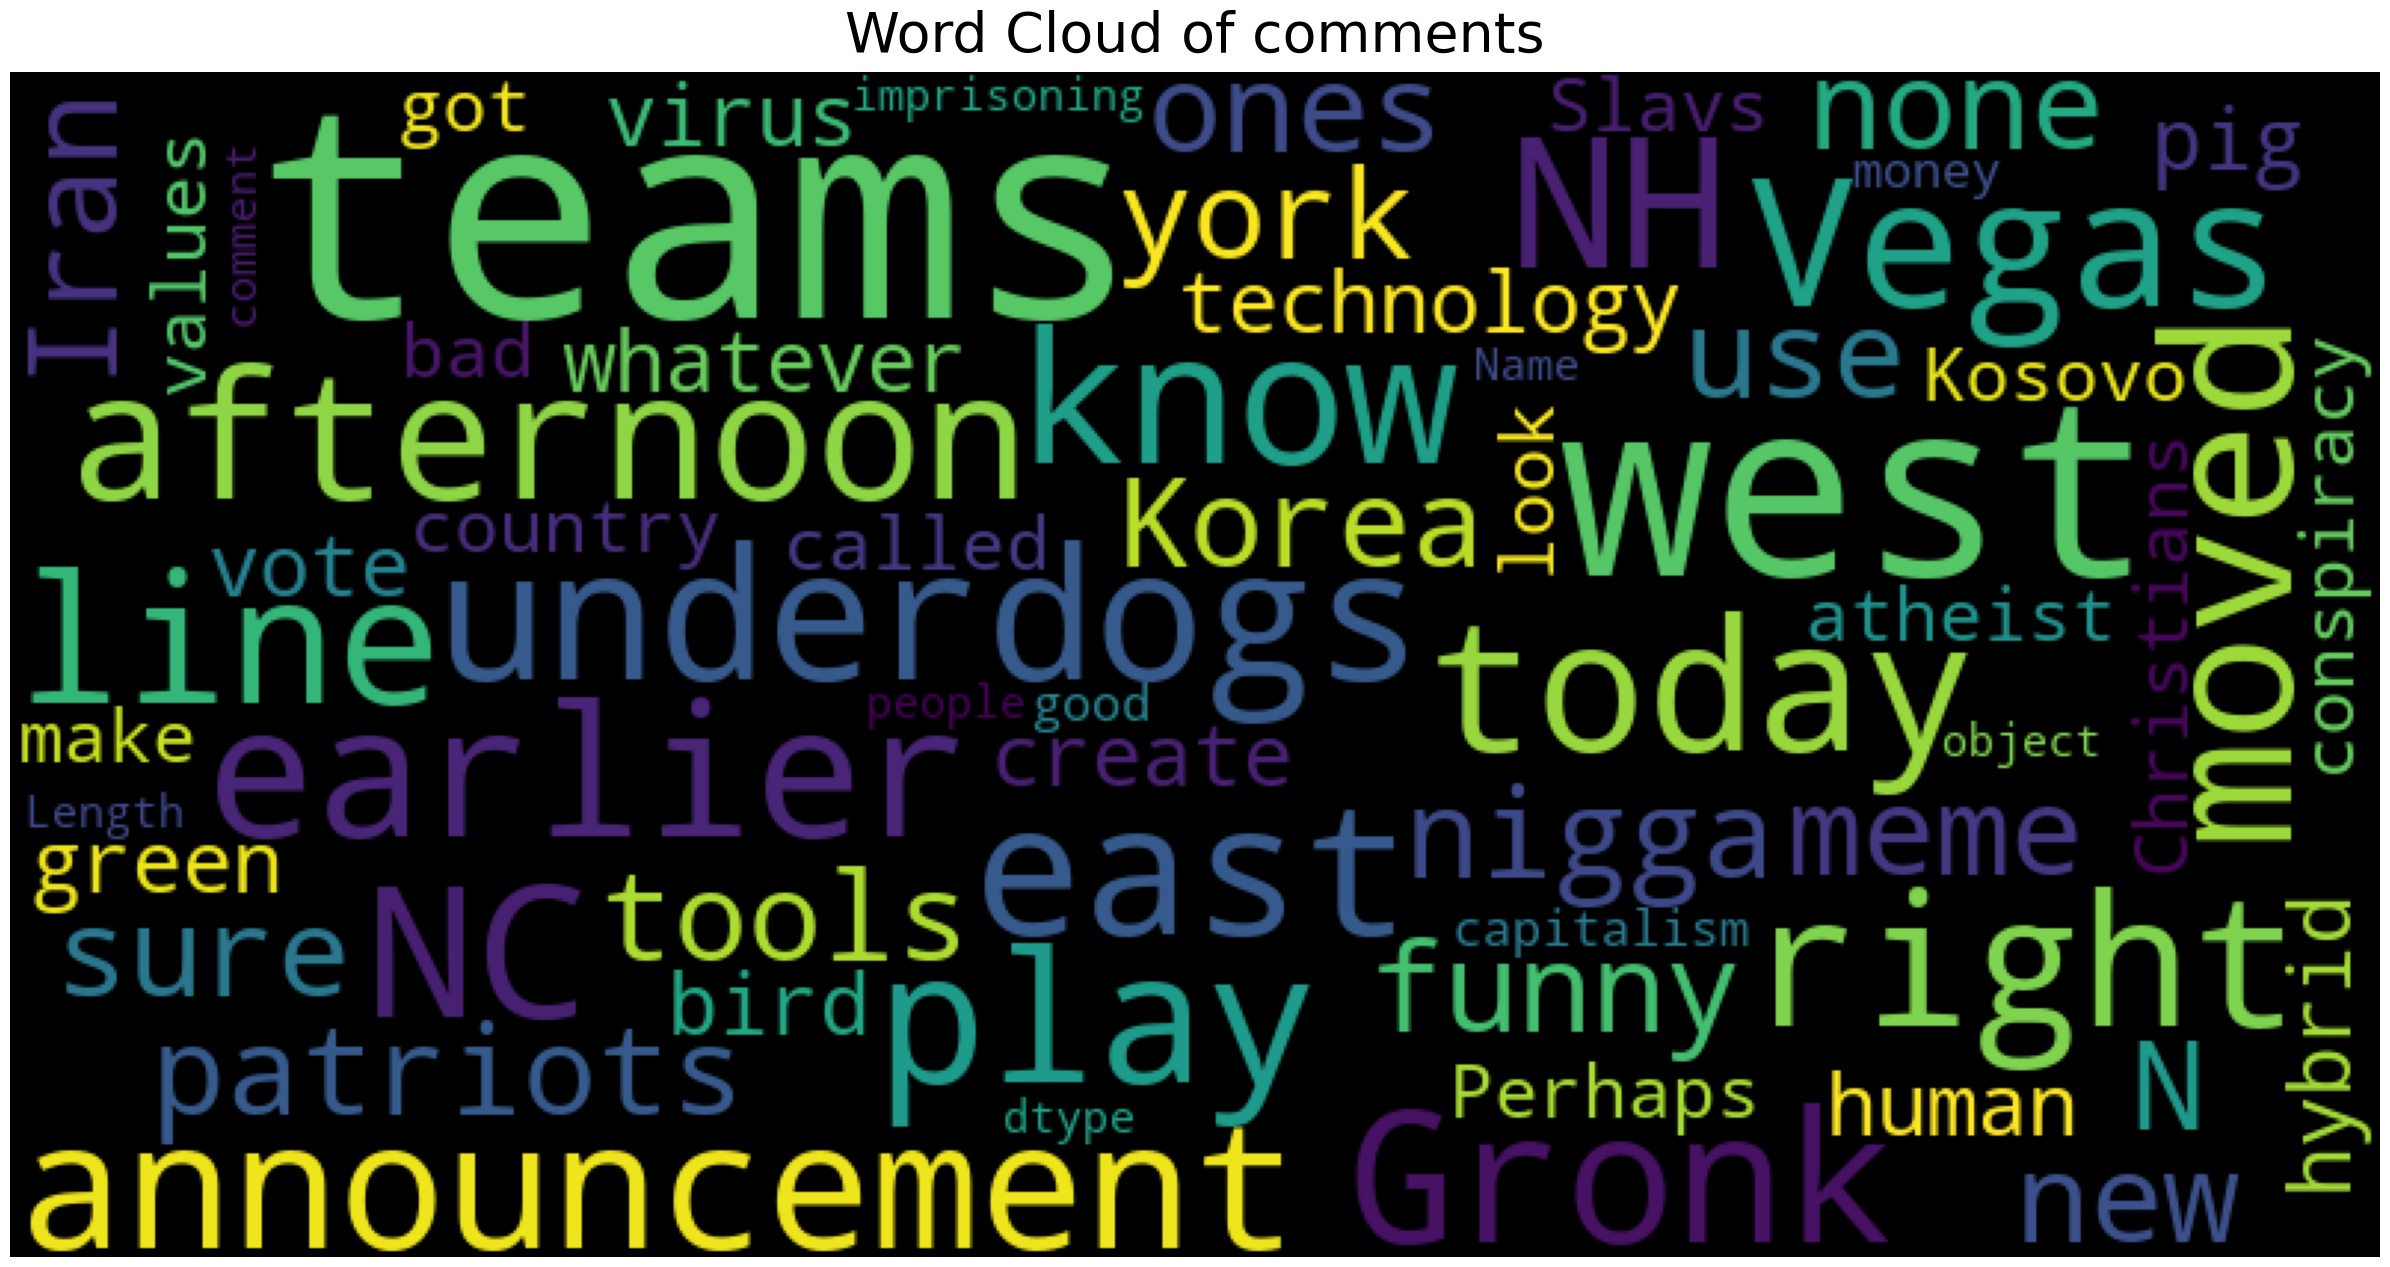

In [39]:

"""
Generates a word cloud image from text.

Parameters:
- text (str): The text to generate the word cloud from. 
- mask (np.ndarray or None): Optional mask to apply to the word cloud.
- max_words (int): Maximum number of words to include in the word cloud.
- max_font_size (int): Maximum font size for words in the word cloud.
- figure_size (tuple): Width, height of the word cloud figure. 
- title (str): Optional title for the figure.
- title_size (int): Font size for the figure title.
- image_color (bool): Whether to render the image in color.
"""
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["comment"], title="Word Cloud of comments")

In [40]:
"""
defaultdict allows values to be set without initializing keys first.
string contains various string manipulation functions.
"""
from collections import defaultdict
import string 

In [41]:

"""
generate_ngrams generates n-grams from the given text by:

1. Removing leading/trailing punctuation and lowercasing 
2. Splitting text into tokens and removing empty tokens and stopwords
3. Zipping the tokens into n-grams of size n_gram
4. Joining the tokens in each n-gram into a string 

Returns a list of n-grams.
"""
def generate_ngrams(text, n_gram=1): 
    token = [token.strip(string.punctuation) 
             for token in text.lower().split(" ") 
             if token.strip(string.punctuation) != "" if token not in STOPWORDS] 
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of sincere comments", 
                                          "Frequent words of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [42]:

"""Generates n-gram frequency distribution from text data.

Iterates through sentences in the provided text column, generates 
n-grams for each sentence, and increments frequency counts for each
n-gram in a defaultdict. Converts frequency distribution to DataFrame
sorted by frequency in descending order. Selects top 30 most frequent
n-grams and generates a horizontal bar chart visualization.

Args:
    text_col: Column in DataFrame containing text data.
    n: Size of n-grams to generate.
    
Returns:
    fd_sorted: DataFrame of n-gram frequency distribution. 
    trace: Horizontal bar chart figure object.
"""

freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'orange')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')



In [43]:
# plots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of sincere comments", 
                                          "Frequent bigrams of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [44]:
# Trigrams 
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'green')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'green')


In [45]:
# plots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of sincere comments", 
                                          "Frequent bigrams of sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Modelling 


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [51]:
# split 
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(df['comment'], df['label'], random_state=17)

In [52]:

'''TfidfVectorizer constructor configures text vectorization:
- ngram_range: generates n-grams of sizes 1 to 2
- max_features: limits vocabulary to 50,000 most frequent tokens  
- min_df: ignores terms that appear in fewer than 2 documents'''

tf_idf = TfidfVectorizer(ngram_range=(1, 2), 
                         max_features=50000, 
                         min_df=2) 

'''Logistic regression model with the following configuration:
C - Inverse regularization strength, must be positive. Like in SVM, smaller values specify stronger regularization.
n_jobs - Number of CPU cores used during the cross-validation loop. -1 means 'all cores'.
solver - Algorithm for optimization problem. 'lbfgs' is an optimizer in the family of quasi-Newton methods.
random_state - Seed for random number generation.'''

# Fit the pipeline to the training data and predict on test data    
logit = LogisticRegression(C=1, 
                           n_jobs=4, 
                           solver='lbfgs', 
                           random_state=17, 
                           verbose=1) 
#  
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)] 
                               )

tfidf_logit_pipeline

Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [53]:
## Train

tfidf_logit_pipeline.fit(train_texts,
                         y_train) 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        50001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25460D+05    |proj g|=  1.32078D+03


 This problem is unconstrained.



At iterate   50    f=  4.09699D+05    |proj g|=  1.82958D+03

At iterate  100    f=  4.05984D+05    |proj g|=  6.61064D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
50001    100    115      1     0     0   6.611D+01   4.060D+05
  F =   405983.84449071100     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   30.7s finished


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [59]:
# Acc

# valid_test
valid_pred = tfidf_logit_pipeline.predict(valid_texts)


accuracy_score(y_valid, valid_pred)

0.7207887801055822